# Módulo 2 - Técnicas de Programação II
## Aula 7
- Streamlit

## Streamlit
https://streamlit.io/

In [1]:
!pip install streamlit

  Using cached streamlit-1.11.1-py2.py3-none-any.whl (9.1 MB)
  Using cached blinker-1.5-py2.py3-none-any.whl (12 kB)
  Using cached GitPython-3.1.27-py3-none-any.whl (181 kB)
  Using cached semver-2.13.0-py2.py3-none-any.whl (12 kB)
  Using cached altair-4.2.0-py3-none-any.whl (812 kB)
  Using cached rich-12.5.1-py3-none-any.whl (235 kB)
  Using cached tzlocal-4.2-py3-none-any.whl (19 kB)
  Using cached pydeck-0.7.1-py2.py3-none-any.whl (4.3 MB)
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=7c67cca26a76d209e6033b777f8bad87b4950075d0487b7c2d571dfc776dcfdd
  Stored in directory: c:\users\brunoissamo\appdata\local\pip\cache\wheels\2d\f0\a8\1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


**Passo a passo de uso**
1. Crie um arquivo **.py** com o código no mesmo formato deste na célula abaixo

In [2]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


st.title('Dashboard de EDA')

# Personalizando o SideBar
st.sidebar.title('Menu')

#Setup do upload do arquivo
arquivo=st.sidebar.file_uploader(
    label='Selecione o arquivo csv ou excel',
    type=['csv', 'xslx']
)

if arquivo is not None:
    print(arquivo)

    try:
        df = pd.read_csv(arquivo)
        checkbox = st.sidebar.checkbox('Mostrar DataFrame')
        numeric_columns = df.select_dtypes(['float64', 'float32', 'int64', 'int32']).columns
        if checkbox:
            st.subheader('DataFrame')
            st.write('Dimensões do DataFrame: '+ str(df.shape[0]) + ' linhas e ' + str(df.shape[1]) + ' colunas')
            st.dataframe(df)
        corr = st.sidebar.checkbox('Mostrar Heatmap de correlação')
        if corr:
            st.subheader('Heatmap de correlação entre as variáveis')
            fig, ax = plt.subplots()
            sns.heatmap(df.corr())
            st.pyplot(fig)    
    except:
        df = pd.read_excel(arquivo)
        checkbox = st.sidebar.checkbox('Mostrar DataFrame')
        numeric_columns = df.select_dtypes(['float64', 'float32', 'int64', 'int32']).columns
        if checkbox:
            st.subheader('DataFrame')
            st.write('Dimensões do DataFrame: '+ str(df.shape[0]) + 'linhas e ' + str(df.shape[1]) + 'colunas')
            st.dataframe(df)
        corr = st.sidebar.checkbox('Mostrar Heatmap de correlação')
        if corr:
            st.subheader('Heatmap de correlação entre as variáveis')
            fig, ax = plt.subplots()
            sns.heatmap(df.corr())
            st.pyplot(fig)  


biblioteca = st.sidebar.selectbox('Selecione a biblioteca', ['Matplotlib', 'Seaborn', 'Plotly'])
tipo_grafico = st.sidebar.selectbox('Selecione o tipo de gráfico', ['Scatterplots', 'Lineplots', 'Barplots', 'Histogram', 'Boxplot'])

try:
    if biblioteca=='Matplotlib':
        st.write('## Matplotlib')
        if tipo_grafico == 'Scatterplots':
            st.subheader('Gráfico de Dispersão (Scatterplot)')
            st.sidebar.subheader('Configurações do Gráfico de Dispersão (Scatterplot)')
            xaxis = st.sidebar.selectbox('Selecione variável do eixo X', options=numeric_columns)
            yaxis = st.sidebar.selectbox('Selecione variável do eixo y', options=numeric_columns)

            fig, ax = plt.subplots()
            plt.scatter(data=df, x= xaxis, y=yaxis)
            plt.xlabel(xaxis)
            plt.ylabel(yaxis)

            st.pyplot(fig)

        elif tipo_grafico=='Lineplots':
            st.subheader('Gráfico de Linha')
            st.sidebar.subheader('Configurações do Gráfico de Linhas')
            xaxis = st.sidebar.selectbox('Selecione variável do eixo X', options=df.columns)
            yaxis = st.sidebar.selectbox('Selecione variável do eixo y', options=df.columns)

            fig, ax = plt.subplots()
            plt.plot(df[xaxis], df[yaxis])
            plt.xlabel(xaxis)
            plt.ylabel(yaxis)

            st.pyplot(fig)

        elif tipo_grafico=='Barplots':
            st.subheader('Gráfico de Barras')
            st.sidebar.subheader('Configurações do Gráfico de Barras')
            xaxis = st.sidebar.selectbox('Selecione variável do eixo X', options=df.columns)
            yaxis = st.sidebar.selectbox('Selecione variável do eixo y', options=numeric_columns)

            fig, ax = plt.subplots()
            plt.bar(df[xaxis], df[yaxis])
            plt.xlabel(xaxis)
            plt.ylabel(yaxis)

            st.pyplot(fig)
            
    elif biblioteca=='Plotly':
        st.write('## Plotly')
        if tipo_grafico == 'Scatterplots':
            st.subheader('Gráfico de Dispersão (Scatterplot)')
            st.sidebar.subheader('Configurações do Gráfico de Dispersão (Scatterplot)')
            xaxis = st.sidebar.selectbox('Selecione variável do eixo X', options=numeric_columns)
            yaxis = st.sidebar.selectbox('Selecione variável do eixo y', options=numeric_columns)

            plot = px.scatter(data_frame=df, x= xaxis, y=yaxis)
            st.plotly_chart(plot)
except:
    print('')



2. Se você estiver utilizando o Anaconda, entre no *Anaconda Prompt*
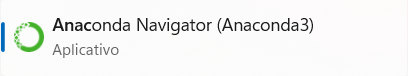

3. Instale o Streamlit  
pip install streamlit
  
4. Encontre a pasta na qual você salvou o código **.py** com o comando: cd caminho_do_arquivo
5. Alterado o diretório, emita o comando: streamlit run nome_do_arquivo.py
6. O streamlit abrirá no seu navegador padrão o dashboard criado

**Passo a passo de publicação**

1. Para publicação do seu dashboard é necessário dois arquivos:
    * o **.py** desenvolvido
    * um requirements.txt contendo as bibliotecas e as respectivas versões
    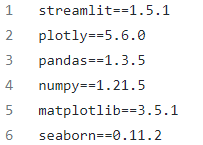
    
2. Com isso, entre no link https://share.streamlit.io/
3. Faça  login com seu GitHub
4. Clique em *New app**
5. Preencha as informações referentes ao repositório do github
6. Clique em *Deploy*